# Bagging


Bagging (Bootstrapping Aggregating)
결정트리를 랜덤하게 만들어서 각 결정트리의 예측을 사용해 최종 예측을 만든다.


- 부트스트랩 샘플방식을 사용한다.(중복된 샘플을 뽑는 방식, 복원추출)
- 노드분할시 전체특성중에서 일부 특성을 무작위로 고른 다음 최선의 분할방식을 찾는다. 기본적으로 전체 특성개수의 제곱근만큼 특성을 선택한다.
- 기본적으로 100개의 결정트리를 사용한다.
- 분류모델의 경우에는 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼는다.
- 회귀모델인 경우 단순히 각 트리의 예측을 평균한다.


![https://medium.com/@brijesh_soni/boost-your-machine-learning-models-with-bagging-a-powerful-ensemble-learning-technique-692bfc4d1a51](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*a6hnuJ8WM37mLimHfMORmQ.png)


![](https://bradleyboehmke.github.io/HOML/images/bootstrap-scheme.png)


In [25]:
from statistics import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# RandomForestClassifier

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
# 모델 학습
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    random_state=42,
    max_depth=2)
rf_clf.fit(X_train, y_train)


print('학습셋 : ', rf_clf.score(X_train, y_train))
print('평가셋 : ', rf_clf.score(X_test, y_test))

학습셋 :  0.9648351648351648
평가셋 :  0.9473684210526315


In [28]:
# 부트스트랩 방식 확인
print('samples = ', len(rf_clf.estimators_samples_))  #n_estimators와 동일
# 학습기 수랑 동일하게 100개 추출 된 것임


for i, sample_index in enumerate(rf_clf.estimators_samples_[:5]):
    print(i, [int(i) for i in sorted(sample_index)])
     # 중복이 나올 수 있다 = 복원추출방식==부트스트랩방식


samples =  100
0 [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 4, 4, 5, 6, 7, 8, 8, 9, 11, 13, 14, 14, 14, 14, 15, 15, 18, 20, 22, 23, 23, 24, 25, 26, 27, 28, 32, 33, 34, 34, 34, 35, 36, 36, 37, 38, 38, 39, 41, 41, 41, 42, 45, 45, 45, 47, 48, 48, 48, 49, 52, 52, 53, 55, 57, 59, 59, 60, 62, 63, 64, 64, 64, 64, 65, 65, 65, 65, 66, 66, 67, 68, 68, 69, 69, 70, 70, 70, 70, 71, 71, 72, 73, 74, 74, 75, 77, 79, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 93, 93, 95, 95, 95, 97, 98, 99, 100, 100, 100, 102, 103, 103, 104, 104, 105, 105, 105, 108, 109, 110, 110, 113, 113, 116, 120, 120, 121, 122, 122, 125, 129, 129, 130, 131, 132, 132, 133, 135, 137, 138, 140, 140, 143, 146, 150, 156, 157, 157, 165, 165, 166, 166, 166, 169, 169, 172, 173, 173, 175, 177, 178, 178, 183, 184, 184, 187, 187, 191, 193, 193, 194, 194, 196, 198, 199, 199, 199, 200, 203, 203, 203, 205, 206, 208, 209, 211, 211, 213, 213, 214, 215, 215, 215, 215, 217, 219, 221, 221, 222, 223, 223, 223, 224, 227, 227, 228, 229, 231, 231, 232, 233, 233,

In [32]:
# 특성 중요도
cancer = load_breast_cancer()

feat_importances_ser = pd.Series(
    rf_clf.feature_importances_,
    index = cancer.feature_names
)

feat_importances_ser.sort_values(ascending=False)

feat_importances_ser

worst area                 0.157883
worst concave points       0.139758
mean concave points        0.107360
worst radius               0.106104
mean perimeter             0.082240
mean radius                0.079443
worst perimeter            0.070185
mean concavity             0.065683
mean area                  0.056182
worst concavity            0.036289
area error                 0.031985
worst compactness          0.016590
radius error               0.012367
mean compactness           0.012350
perimeter error            0.005062
worst texture              0.004029
worst smoothness           0.003725
compactness error          0.002566
worst symmetry             0.002472
worst fractal dimension    0.001840
mean texture               0.001753
mean fractal dimension     0.001206
texture error              0.001197
concavity error            0.000682
mean smoothness            0.000493
concave points error       0.000319
fractal dimension error    0.000238
mean symmetry              0

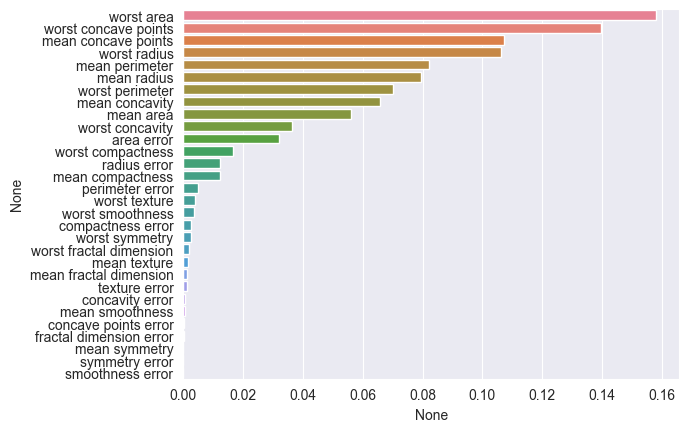

In [33]:
# 시각화
sns.barplot(
    x = feat_importances_ser,
    y = feat_importances_ser.index,
    hue = feat_importances_ser.index
)

plt.show()

### 일반화 성능
- cross_val_score / cross_validate
- oob_score

In [24]:
# cross_validate
from sklearn.model_selection import cross_validate
rf_clf = RandomForestClassifier(random_state=42, max_depth=3)
                                                # 10 으로 설정하면 과적합

results = cross_validate(
    rf_clf,
    X_train,
    y_train,
    cv=3,
    return_train_score=True, # 각 fold마다 훈련 정확도(train_score) 반환.
    verbose=1 # 교차검증 진행과정을 출력 == 로그 찍는 거

)
print("Train Acc : ", np.mean(results["train_score"]))
print('Test Acc : ', np.mean(results["test_score"]))


Train Acc :  0.9879132650107115
Test Acc :  0.9494161728825374


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished
